<a href="https://colab.research.google.com/github/YinYinTan/CIND820FinalProject/blob/main/4_Random_Forest_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification Models
Evaluations using Train-Test Split

In [99]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.feature_selection import RFE
import time

In [100]:
import pandas as pd

#Read file
df = pd.read_csv('3a. Working Dataset.csv', index_col=None)

# All Features in Working Dataset

In [101]:
#Split dataframe, using 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

In [102]:
#Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
smote = SMOTE(random_state = 888)
X_train, y_train = smote.fit_resample(X_train, y_train)

#Random forest classification model

t1 = time.perf_counter() #time counter start

model = RandomForestClassifier(random_state=888)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

t2 = time.perf_counter() #time counter ends

print('Execution time in seconds:', int(t2-t1), "\n")

#Save results into dictionary
rf_all = {'Accuracy':metrics.accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred),'Recall':metrics.recall_score(y_test, y_pred),\
          'F1-Score':metrics.f1_score(y_test, y_pred),'AUC':metrics.roc_auc_score(y_test, y_pred),'Brier Score':metrics.brier_score_loss(y_test, y_pred)}

#Evaluation of random forest classification model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))

Execution time in seconds: 2 

Accuracy: 0.7517321016166282
Precision: 0.8331877729257642
Recall: 0.7996647108130763
F1-score: 0.8160821214713431
Area Under Curve (AUC): 0.7226523925122894
Brier Score: 0.24826789838337182


# Selected Features - Filter Method
[Previous "All Features" section must be run first]

In [103]:
#Identify top 20 features
model = RandomForestClassifier(random_state=888)
model.fit(X_train, y_train)

feature_names = df.drop(['Worse_MH'],axis=1).columns

feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp = feature_imp[:20]

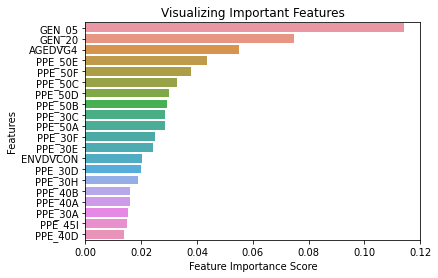

In [104]:
#Plot top 20 features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Top 5 Features - Filter Method
Based on the bar graph above, it was decided to build a random forest model using only the top 5 features.

In [105]:
#Obtain names of top 5 variables
top_five = feature_imp[:5].index
top_five

Index(['GEN_05', 'GEN_20', 'AGEDVG4', 'PPE_50E', 'PPE_50F'], dtype='object')

In [106]:
#Split dataframe, using 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

#Only select top 5 variables for X
X = df.loc[:,top_five]
y = df['Worse_MH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

In [107]:
#Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
smote = SMOTE(random_state = 888)
X_train, y_train = smote.fit_resample(X_train, y_train)

#Random forest classification model

t1 = time.perf_counter() #time counter start

model = RandomForestClassifier(random_state=888)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

t2 = time.perf_counter() #time counter ends

print('Execution time in seconds:', int(t2-t1), "\n")

#Save results into dictionary
rf_five_features_filter = {'Accuracy':metrics.accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred),'Recall':metrics.recall_score(y_test, y_pred),\
          'F1-Score':metrics.f1_score(y_test, y_pred),'AUC':metrics.roc_auc_score(y_test, y_pred),'Brier Score':metrics.brier_score_loss(y_test, y_pred)}

#Evaluation of random forest classification model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))

Execution time in seconds: 0 

Accuracy: 0.7323903002309469
Precision: 0.852245292129406
Recall: 0.739731768650461
F1-score: 0.7920125645052727
Area Under Curve (AUC): 0.7279363852528743
Brier Score: 0.26760969976905313


## Top 10 Features - Filter Method
A random forest model using the top 10 features, to see if model performance improves.

In [108]:
#Obtain names of top 10 variables
top_ten = feature_imp[:10].index
top_ten

Index(['GEN_05', 'GEN_20', 'AGEDVG4', 'PPE_50E', 'PPE_50F', 'PPE_50C',
       'PPE_50D', 'PPE_50B', 'PPE_30C', 'PPE_50A'],
      dtype='object')

In [109]:
#Split dataframe, using 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

#Only select top 10 variables for X
X = df.loc[:,top_ten]
y = df['Worse_MH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

In [110]:
#Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
smote = SMOTE(random_state = 888)
X_train, y_train = smote.fit_resample(X_train, y_train)

#Random forest classification model

t1 = time.perf_counter() #time counter start

model = RandomForestClassifier(random_state=888)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

t2 = time.perf_counter() #time counter ends

print('Execution time in seconds:', int(t2-t1), "\n")

#Save results into dictionary
rf_ten_features_filter = {'Accuracy':metrics.accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred),'Recall':metrics.recall_score(y_test, y_pred),\
          'F1-Score':metrics.f1_score(y_test, y_pred),'AUC':metrics.roc_auc_score(y_test, y_pred),'Brier Score':metrics.brier_score_loss(y_test, y_pred)}

#Evaluation of random forest classification model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))

Execution time in seconds: 1 

Accuracy: 0.7297921478060047
Precision: 0.8310502283105022
Recall: 0.7627829002514669
F1-score: 0.7954545454545454
Area Under Curve (AUC): 0.7097773499402047
Brier Score: 0.2702078521939954


# 5 Selected Features using Recursive Feature Elimination (RFE) - Wrapper Method

In [111]:
#Split dataframe, using 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

X = df.drop(['Worse_MH'],axis=1)
y = df['Worse_MH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888, stratify=y)

In [112]:
#Apply Synthetic Minority Oversampling Technique (SMOTE) to training set to correct class imbalance
smote = SMOTE(random_state = 888)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [113]:
#Random forest classification model with RFE for 5 features

t1 = time.perf_counter() #time counter start

model = RandomForestClassifier(random_state=888)

#5 chosen as the number of features based on the previous models using the filter method for feature selection, where 5 features performed similarly to 10
rfe = RFE(estimator=model, n_features_to_select=5) 
fit = rfe.fit(X_train, y_train)

t2 = time.perf_counter() #time counter ends

for feature in fit.support_.nonzero():
  print('5 selected features:', X_train.columns[feature])

print('Execution time in seconds:', int(t2-t1))

5 selected features: Index(['PPE_50A', 'PPE_50C', 'PPE_50E', 'GEN_05', 'GEN_20'], dtype='object')
Execution time in seconds: 120


In [114]:
y_pred=fit.predict(X_test)

#Save results into dictionary
rf_five_features_rfe = {'Accuracy':metrics.accuracy_score(y_test, y_pred), 'Precision':metrics.precision_score(y_test, y_pred),'Recall':metrics.recall_score(y_test, y_pred),\
          'F1-Score':metrics.f1_score(y_test, y_pred),'AUC':metrics.roc_auc_score(y_test, y_pred),'Brier Score':metrics.brier_score_loss(y_test, y_pred)}

#Evaluation of random forest classification model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Area Under Curve (AUC):", metrics.roc_auc_score(y_test, y_pred))
print("Brier Score:", metrics.brier_score_loss(y_test, y_pred))

Accuracy: 0.6986143187066974
Precision: 0.8465909090909091
Recall: 0.6869237217099748
F1-score: 0.7584451642757983
Area Under Curve (AUC): 0.7057067588141711
Brier Score: 0.30138568129330257


# Comparison of Models

In [115]:
#Combine performance metrics for all models into one dataframe
comparison = pd.DataFrame([rf_all, rf_five_features_filter, rf_ten_features_filter, rf_five_features_rfe], index=['RF All Features','RF 5 Features - Filter','RF 10 Features - Filter','RF 5 Features - RFE'])
comparison

,Accuracy,Precision,Recall,F1-Score,AUC,Brier Score
RF All Features,0.751732,0.833188,0.799665,0.816082,0.722652,0.248268
RF 5 Features - Filter,0.732390,0.852245,0.739732,0.792013,0.727936,0.267610
RF 10 Features - Filter,0.729792,0.831050,0.762783,0.795455,0.709777,0.270208
RF 5 Features - RFE,0.698614,0.846591,0.686924,0.758445,0.705707,0.301386


In [116]:
#Friedman test to compare results of the three models???
from scipy.stats import friedmanchisquare

stat, p = friedmanchisquare(comparison.iloc[0], comparison.iloc[1], comparison.iloc[2])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1.333, p=0.513
